# Plotting and Visualization

Many problems encountered in EE involve processing large amounts of data.  One of the first steps here would be to visualize this data to understand what it looks like and what can be done with it.

In [1]:
# Imports and settings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

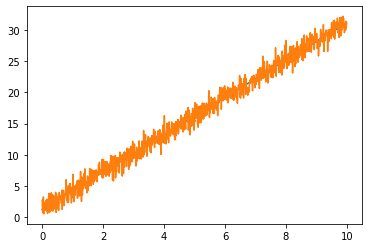

In [2]:
# Create a time base and a straight line fit
t = np.arange(0, 10, 0.01)
def stline(x, m, c):
    return m * x + c
y = stline(t, 3, 1.2)
# Add Gaussian noise
n = 1 * np.random.randn(len(t))
yn = y + n
plt.plot(t, y, t, yn)

<ErrorbarContainer object of 3 artists>

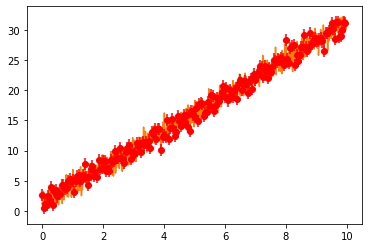

In [3]:
# Get errorbars from noise 
plt.plot(t, y, t, yn)
plt.errorbar(t[::5], yn[::5], np.std(n), fmt='ro')

# Least Squares Curve Fitting

Assume we know something about the function that underlies the observed data (for example, that it is linear or a polynomial function).  However, we don't know the coefficients of the various terms.  For example, say our function takes two parameters $p_1$ and $p_2$, and is a linear function of the time variable $t$: $g(t, p_1, p_2) = p_1 t + p_2$.  

We have a number of *observations* $g_1, g_2, \ldots, g_n$ of this function at different time instants $t_1, t_2, \ldots, t_n$.  These observations can then be written as:

$$
\mathbf{g} \equiv
\begin{pmatrix}
g_1 \\
g_2 \\
\vdots \\
g_n
\end{pmatrix}
=
\begin{pmatrix}
t_1 & 1 \\
t_2 & 1 \\
\vdots & \vdots \\
t_n & 1
\end{pmatrix}
\begin{pmatrix}
p_1 \\
p_2
\end{pmatrix}
\equiv
\mathbf{M}\mathbf{p}
$$

## Mean Square Error
We can therefore define an error $\varepsilon = \mathbf{Mp}-\mathbf{g}$ (note that this is itself a vector of point-wise errors), and a *mean-square error* or MSE as:

$$
E = \varepsilon^T \varepsilon = \sum_{1}^{N} \varepsilon_i = \sum_1^N ((p_1 t_i + p_2) - g_i)^2
$$

The goal of *least squares fitting* is to find the parameters $p_i$ such that this MSE $E$ is minimized.  More details of how this works can be seen at [LibreTexts](https://math.libretexts.org/Bookshelves/Linear_Algebra/Interactive_Linear_Algebra_(Margalit_and_Rabinoff)/06%3A_Orthogonality/6.5%3A_The_Method_of_Least_Squares).

In our case, we can use the `lstsq` function from the `numpy.linalg` library.  For this, we have to construct the $\mathbf{M}$ matrix.

In [4]:
# Use column_stack to put the vectors side by side
# print(t)
M = np.column_stack([t, np.ones(len(t))])
print(M)
# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, yn, rcond=None)
print(f"The estimated equation is {p1} t + {p2}")

[[0.   1.  ]
 [0.01 1.  ]
 [0.02 1.  ]
 ...
 [9.97 1.  ]
 [9.98 1.  ]
 [9.99 1.  ]]
The estimated equation is 2.999995964394129 t + 1.2168707686425493


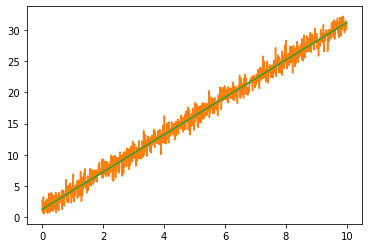

In [5]:
# Plot against the original input and compare
yest = stline(t, p1, p2)
plt.plot(t, y, t, yn, t, yest)

# Non-linear curve fitting

What if your equation was not a linear function of the parameters?  For example:
$$g(t; p_1, p_2) = e^{-p_1 t} + p_2$$

The problem here is that we cannot create the $M$ matrix as a linear combination of $p_1$ and $p_2$!  We still have a notion of MSE:

$$E = \sum_1^N (g(t; p_1, p_2) - z_t)^2$$
where $z_t$ are the observed values.  However, the least squares minimization techniques discussed earlier do not work.  

## `curve_fit`

The `scipy.optimize` library contains the `curve_fit` function that can perform a non-linear curve fitting on observed data.  Unlike the least squares method, here we need to feed in a parametrized function that can be used to estimate the parameters.  

<ErrorbarContainer object of 3 artists>

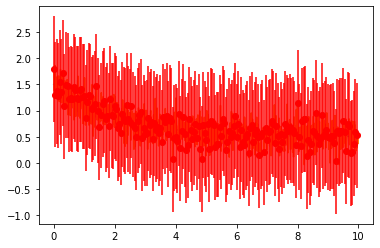

In [6]:
# Create a function with nonlinear dependence on parameters
def nlfunc(t, p1, p2):
    return np.exp(-p1 * t) + p2
z = nlfunc(t, 0.5, 0.5)
# Reuse the same noise - we are lazy
zn = z + 0.2*n
plt.plot(t, z, t, zn)
plt.errorbar(t[::5], zn[::5], np.std(n), fmt='ro')

In [7]:
# Set up the non-linear curve fit
from scipy.optimize import curve_fit
(zp1, zp2), pcov = curve_fit(nlfunc, t, zn)
print(f"Estimated function: exp(-{zp1}t) + {zp2}")

Estimated function: exp(-0.5015504496447013t) + 0.5039634975287652


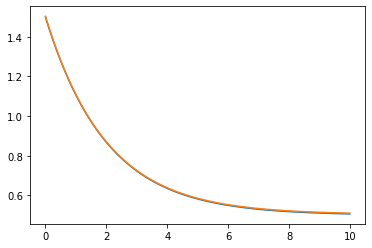

In [8]:
zest = nlfunc(t, zp1, zp2)
plt.plot(t, z, t, zest)

Estimated: 4.9858138072545675 * sin(2*pi*0.4999603311930698*t)


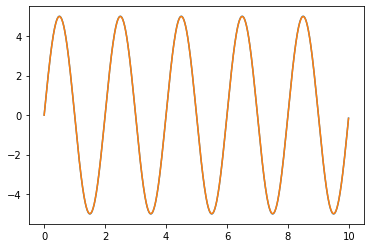

In [9]:
# Non-linear sinusoidal function
def sinfunc(t, p1, p2):
    return p1 * np.sin(2 * np.pi * p2 * t)
s = sinfunc(t, 5, 0.5)
sn = s + 0.2*n
# Fit with only first K points
K = 100
# print(len(t))
(sp1, sp2), _ = curve_fit(sinfunc, t[:K], sn[:K])
print(f"Estimated: {sp1} * sin(2*pi*{sp2}*t)")
# Regenerate data
sest = sinfunc(t, sp1, sp2)
plt.plot(t, s, t, sest)

# Assignment

- You are given several data sets in text format.  For each of them:
  - Plot the data along with errorbars - explain how you obtain the size of the errorbars.
  - Propose a possible best curve fit for each of the data sets.  The exact nature of the function is not given, but some clues may be available.  
  - Perform a curve fitting using appropriate techniques for each of the data.  You need to explain whether you are choosing to use a linear or nonlinear curve fit, and why it is the right approach.  Comment on the accuracy of your approach and whether it gives a good result, or something better could have been done.
- For the straight line fit from the example above, compare the time taken, and accuracy of the fit, for `lstsq` *vs* `curve_fit`.  Comment on your observations.

# Libraries and Packages

In [10]:
from scipy.signal import find_peaks
# Importing this to find the number of peaks, in the Dataset 2.
# It finds the number of local maximas by comparison with the neighbouring values, which are the peaks.

import statistics
import scipy.stats as stats
# To get the pdf, mean, and standard deviation in dataset 4.

# Dataset 1 :
### Plotting the data with errorbars, and obtaining the size of it is remaining.

Reading the dataset from the dataset1.txt file in X and Y, and plotting it.

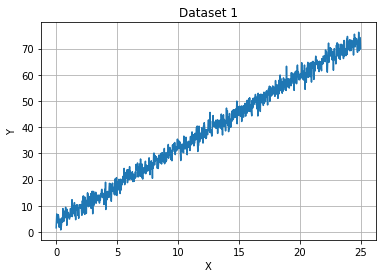

In [11]:
dataset1 = open('dataset1.txt', 'r')
X = []
Y = []

for row in dataset1:
    row = row.split(' ')
    X.append(float(row[0]))
    Y.append(float(row[1]))

plt.grid()
plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Dataset 1")
X=np.array(X,dtype=float)

## Using the lstsq function : 

By looking at the above plot we can consider the function to be linear. However, we don't know the coefficients of slope(p1) and the constant(p2) in the linear equation. <br>
Therefore, I am using the lstsq function that will find these two parameters p1, and p2. <br>
<center> Y = p1*X + p2</center>

The estimated equation is 2.7911242454149177 X + 3.848800101430744
90.9 µs ± 13.3 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


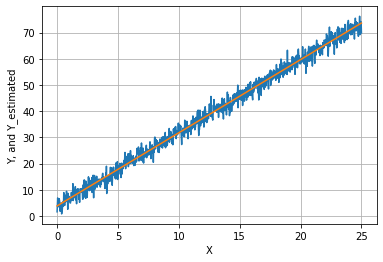

In [12]:
t = np.arange(1, len(X)+1, 1)
M = np.column_stack([X, np.ones(len(t))])

# Use the lstsq function to solve for p_1 and p_2
(p1, p2), _, _, _ = np.linalg.lstsq(M, Y, rcond=None)
print(f"The estimated equation is {p1} X + {p2}")


%timeit np.linalg.lstsq(M, Y, rcond=None) # To note down the time taken by the lstsq function for the dataset

# Plot against the original input and compare
Y_estimated = stline(X, p1, p2)
plt.plot(X, Y, X, Y_estimated)
plt.xlabel("X")
plt.ylabel("Y, and Y_estimated")
plt.grid()

## Using the curve_fit() function : 
Since we are considering the function to be linear , curve_fit() helps us to find the coefficients of slope(m) and constant(c). I am using the stline(x, m, c) function defined above to find the coefficients.

The estimated equation is 2.7911242448201588 X + 3.848800111263445


Text(0, 0.5, 'Y, and estimated value')

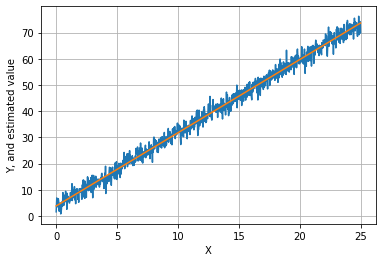

In [13]:
(m, c), _ = curve_fit(stline, X[:], Y[:])
print(f"The estimated equation is {m} X + {c}")

est = stline(X, m, c)
plt.grid()
plt.plot(X, Y, X, est)
plt.xlabel("X")
plt.ylabel("Y, and estimated value")

## Plotting the errobars :


Text(0.5, 1.0, 'Errorbars')

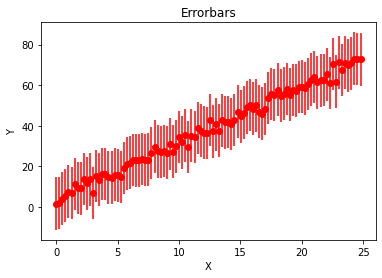

In [14]:
error = X[::1] - Y_estimated[::1]
plt.xlabel("X")
plt.ylabel("Y")
plt.errorbar(X[::10], Y[::10], np.std(error), fmt='ro')
plt.title("Errorbars")

## Accuracy and runtime of lstsq and curve_fit

In [15]:
def error (orig, estimated):
    error = 0
    for i in range(len(orig)):
        error = error + (orig[i]-estimated[i])**2
    return error/len(orig)

# For lstsq
print("Error of lstsq is ", error(Y, Y_estimated), "%")
print("Accuracy of lstsq is ", 100 - error(Y, Y_estimated), "%")
print("Runtime of lstsq is ", end="")
%timeit np.linalg.lstsq(M, Y, rcond=None) # To note down the time taken by the lstsq function for the above dataset

# For curve_fit()
print("\nError of curve_fit() is ", error(Y, est), "%")
print("Accuracy of curve_fit() is ", 100 - error(Y, est), "%")
print("Runtime of curve_fit() is ", end="")
%timeit curve_fit(stline, X[:], Y[:]) # To note down the time of curve_fit() for fitting the above datase

Error of lstsq is  3.9834123805732746 %
Accuracy of lstsq is  96.01658761942673 %
Runtime of lstsq is 97 µs ± 3.66 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)

Error of curve_fit() is  3.983412380573275 %
Accuracy of curve_fit() is  96.01658761942673 %
Runtime of curve_fit() is 316 µs ± 38.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Hence, it can be seen that the accuracy of lstsq is slightly better than curve_fit(). <br>
Also, the runtime of lstsq is less than that of curve_fit(). <br><br>

# Dataset 2 : 

Reading the dataset from the dataset2.txt file in X and Y, and plotting it.

Text(0, 0.5, 'Y')

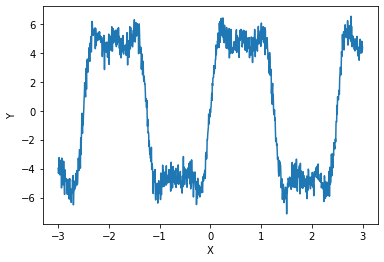

In [16]:
dataset2 = open('dataset2.txt', 'r')
X = []
Y = []

for row in dataset2:
    row = row.split(' ')
    X.append(float(row[0]))
    Y.append(float(row[1]))

plt.plot(X, Y)
plt.xlabel("X")
plt.ylabel("Y")

## Approach : 
&emsp; 1] I have used the Fourier transform of Y, with the sampling frequencies as that of X. <br>
&emsp; 2] After getting the Fourier transform of Y with the sampling frequencies of X, I have plotted it and tried to find the peaks. <br>
&emsp; 3] In Fourier transform, we know that the peaks represents the dominant frequencies in the sum of sine wave (or harmonics). On doing the fourier transform, we get peaks including noise. <br>
&emsp; 4] The noise degrades the performance of Fourier series, and I have therefore ignored the peaks which comes below a certain level, here 250. <br>

Non linear curve fitting will be better in this case, since it consists of sine waves.

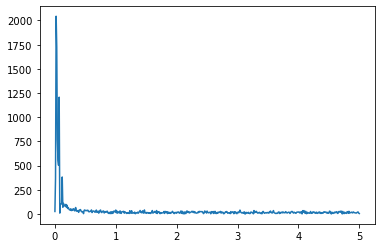

In [17]:
xf = np.fft.rfftfreq(len(X), 0.1)# Taking the discrete fourier transform sample frequencies of the function, with equal spacing
# len(X), represents the window size, 0.1 represents the sample spacing
yf = np.fft.rfftn(Y)

# yf contains imaginary numbers, I have taken the magnitude to consider the effect of both real and complex parts
plt.plot(xf, abs(yf))

# Ignoring the noise that occurs, below 250
for i in range(len(yf)):
    if(abs(yf[i])<250): 
        yf[i]=0


(array([ 2,  7, 12], dtype=int64), {})

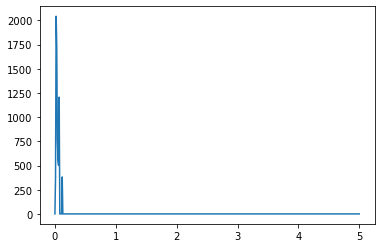

In [18]:
# To find the number of peaks, number of distinct peaks = number of sine waves
plt.plot(xf, abs(yf))
find_peaks(abs(yf)) 

In [19]:
# Since number of peaks are 3, I have considered the function to be summation of 3 sine waves, each of the form A*sin(wt+phi)
# This function returns the sum of 3 sine waves for each sample of X. It is used to estimate the individual values : A, w, phi
# of each sine wave.
def sin_function(X, Amp1, Amp2, Amp3, phi1, phi2, phi3, w1, w2, w3):
    return Amp1*np.sin(np.multiply(w1,X)+phi1)+Amp2*np.sin(np.multiply(w2, X)+phi2)+Amp3*np.sin(np.multiply(w3, X)+phi3)


The 3 sine waves are : 
1.0015830327490571 * sin( -12.307877920022538 * t +  -27.715913691238676 )
1.9985303508626648 * sin( -7.483623636587905 * t +  -15.538519581571412 )
5.9963062454509695 * sin( -2.4924543508798815 * t +  -3.0808140507252326 )


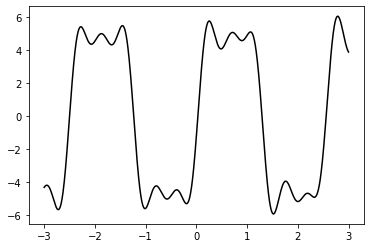

In [20]:
(Amp1,Amp2,Amp3,theta1,theta2,theta3,w1,w2,w3),_=curve_fit(sin_function,X[:260],Y[:260], maxfev = 5000)

plt.plot(X,sin_function(X,Amp1,Amp2,Amp3,theta1,theta2,theta3,w1,w2,w3), 'black')
# plt.plot(X, Y,)

print("The 3 sine waves are : ")
print(Amp1, "* sin(", w1, "* t + ", theta1, ")")
print(Amp2, "* sin(", w2, "* t + ", theta2, ")")
print(Amp3, "* sin(", w3, "* t + ", theta3, ")")
# print(Amp1,Amp2,Amp3,theta1,theta2,theta3,w1,w2,w3)

# Dataset 3 :

Reading the dataset from the dataset3.txt file in B and v, and plotting it.

Text(0, 0.5, 'v = frequency')

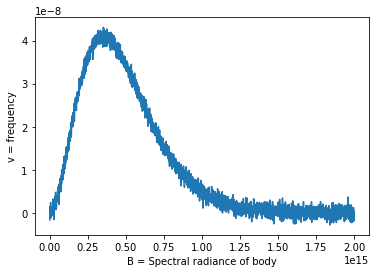

In [21]:
import math
dataset3 =open('dataset3.txt', 'r')
B = []
v = []


for row in dataset3:
    row = row.split(' ')
    B.append(float(row[0]))
    v.append(float(row[1]))
boltzmann_const = 1.38e-23
c= 3.0e8
plt.plot(B,v)
plt.xlabel("B = Spectral radiance of body")
plt.ylabel("v = frequency")

## Estimation of h (Planck's constant), and T (absolute temperature)

In [22]:
v=np.array(v,dtype=float)

# This function finds the estimation of h and T, using the Planck's law formula
# I have given initial guesses for the variables. These are required when the values to be estimated are very high or very low.
# This very high or low values can cause Overflow error, hence an estimation is required.
# The rest of the curve_fit() estimation is similar to that done in Dataset2 for the sine waves
def boltz(v, plancks_const, temp):
    return (2*plancks_const*(v**3)/c**2)*(1/(np.exp(plancks_const*v/(boltzmann_const*temp))-1))

(h,T), _ = curve_fit(boltz, B, abs(v),p0=(6.623e-34, 273), maxfev = 5000)

print("Estimated temperature is :", T)
print("Estimated value of Planck's constant is :", h)

Estimated temperature is : 6002.173616140404
Estimated value of Planck's constant is : 6.628675372721712e-34


# Dataset 4 :

Reading the dataset from dataset4.txt in X and Y, and plotting it.

1000 1000


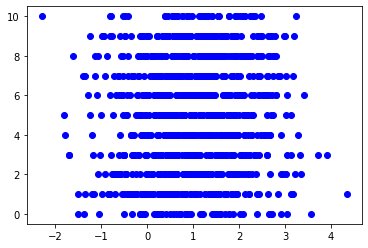

In [23]:
dataset4 = open('dataset4.txt', 'r')
X = []
Y = []
time = []

for row in dataset4:
    row = row.split(' ')
    X.append(float(row[0]))
    Y.append(float(row[1]))

plt.plot(Y, X, 'bo')
print(len(X), len(Y))
# t = np.arange(1, len(X)+1, 1)
# # len(t)

&emsp; Plotting the data of Y as histogram, gives us the Normal Distribution, also called Gaussian distribution function, which is the most common distribution function for indepenedent randomly generated variables.<br>

&emsp; The mean or average of Y is 0.9912205359997814. The graph is symmetric about this point. <br>

&emsp; The standard deviation comes out to be 1.011553738068094. It determines the amount of dispersion away from mean. Small standard deviation (compared to mean) produces steep graph, and large standard deviation (compared to mean) produces flat graph. <br>

&emsp; This helps us determine the probability that 'Y' will take on a specific value or set of values. Total area of this pdf comes out to be 1.

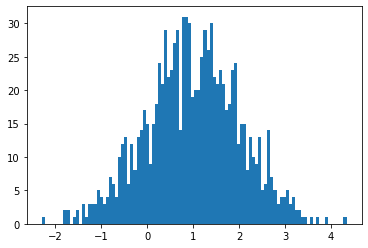

In [24]:
plt.hist(Y, bins=100)
print("")

Plotting the probability density function of Y.

Mean is :  0.9912205359997814
Standard deviation is : 1.011553738068094


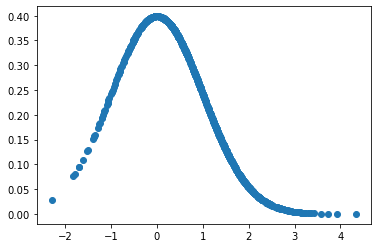

In [25]:
import statistics
import scipy.stats as stats
y = stats.norm.pdf(Y)
mean = statistics.mean(Y)
std = statistics.stdev(Y)
print("Mean is : ", mean)
print("Standard deviation is :", std)
plt.plot(Y, y, 'o')

Below code determines the frequency, average of all its corresponding Y value, minimum and maximum for a particular 'X' over whole of X and Y.

Constant 	 Frequency 	 Average of all its value 	 Till position 	 Minimum 		 Maximum
0.0 		 50 		 0.9622399593043623 		 50 		 -1.5143636673041896 	 3.5773346384645706
1.0 		 100 		 0.7493864360957526 		 150 		 -1.5064820802256582 	 4.341408677683206
2.0 		 100 		 0.8993734064258195 		 250 		 -1.073201890985957 	 3.3540856359878144
3.0 		 100 		 0.9985353242025728 		 350 		 -1.6973141912345016 	 3.925138307333863
4.0 		 100 		 1.1261931172364341 		 450 		 -1.7905462169045205 	 3.290244597423121
5.0 		 100 		 0.973006972112739 		 550 		 -1.8222193139429357 	 3.1392882049943127
6.0 		 100 		 1.0425440590181825 		 650 		 -1.2883336191098653 	 3.416353770328363
7.0 		 100 		 0.9361252765702562 		 750 		 -1.3893429660723156 	 3.1677249452055753
8.0 		 100 		 1.0760842342522006 		 850 		 -1.6089683126754002 	 2.8023224968059264
9.0 		 100 		 0.9730332674383725 		 950 		 -1.2509190559129904 	 3.2056874073136674
10.0 		 50 		 1.102000149408203 		 1000 		 -2.288832964644175 	 3.230348495961287


Text(0, 0.5, 'Y average')

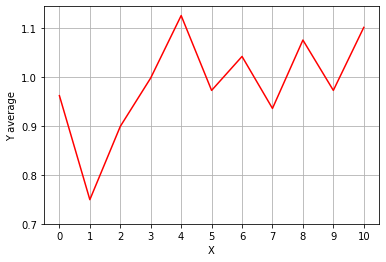

In [26]:
Y_avg = []
const = X[0]
sum = 0
points = 0
size = []
constant = []
minimum = []
maximum = []
mini = Y[0]
maxi = Y[0]

print("Constant \t Frequency \t Average of all its value \t Till position \t Minimum \t\t Maximum")
for i in range(len(X)):
    
    if(X[i]==const):
        if(Y[i]<mini):
            mini = Y[i]
        if(Y[i]>maxi):
            maxi = Y[i]
        sum = sum + Y[i]
        points = points + 1
        const = X[i]
    if(X[i]!=const):
        minimum.append(mini)
        maximum.append(maxi)
        size.append(points)
        Y_avg.append(sum/points)
        constant.append(const)
        print(constant[-1], "\t\t", size[-1], "\t\t", Y_avg[-1], "\t\t", i, "\t\t", minimum[-1], "\t", maximum[-1])
        const = X[i]
        sum = 0 
        points = 1
        mini = Y[i]
        maxi = Y[i]
        
Y_avg.append(sum/ points)
size. append(points)
constant.append(const)
minimum.append(mini)
maximum.append(maxi)
print(constant[-1], "\t\t", size[-1], "\t\t", Y_avg[-1], "\t\t", i+1, "\t\t", minimum[-1], "\t", maximum[-1])

plt.plot(constant, Y_avg, 'r')
plt.grid()
plt.yticks(np.arange(0.7, 1.2, 0.1))
plt.xticks(np.arange(0, 11, 1))
plt.xlabel("X")
plt.ylabel("Y average")

Polynomial coefficients are :  [ 9.56367799e-06 -3.60059870e-04  5.53626316e-03 -4.52406896e-02
  2.15935128e-01 -6.26169290e-01  1.07347595e+00 -8.35366181e-01
  9.62227321e-01]
3.7643204506842576


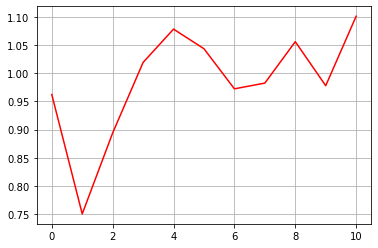

In [27]:
# Trying to fit a 8 degree polynomial through Y 

constant  = np.array(constant, dtype=float)
def polynomial(constant, a8, a7, a6, a5, a4, a3, a2, a1, a0):
    return a8*constant**8 + a7*constant**7 + a6*constant**6 +a5*constant**5 + a4*constant**4 + a3*constant**3 + a2*constant**2 + a1*constant + a0

coeff, _ = curve_fit(polynomial, constant[:], Y_avg[:])
print("Polynomial coefficients are : ", coeff)
print(polynomial(-1, coeff[0], coeff[1], coeff[2], coeff[3], coeff[4], coeff[5], coeff[6], coeff[7], coeff[8]))
plt.plot(constant, polynomial(constant, coeff[0], coeff[1], coeff[2], coeff[3], coeff[4], coeff[5], coeff[6], coeff[7], coeff[8]), 'r')
plt.grid()